In [ ]:
install.packages("tidyverse")
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
library(lubridate)
options(repr.plot.width=5, repr.plot.height=4)

# STATS 306
## Homework 2:  Using `dplyr`

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Naming frequency (4 points)
Problem 1 is based on the `babynames` data set. Use help(babynames) to learn more on this dataset

In [ ]:
install.packages("babynames")
library(babynames)
summary(babynames)

In [ ]:
head(babynames)

**(a)** What were the top five most popular names for boys and girls in 1925? _1 point_

In [ ]:
babynames %>%
  filter(year == 1925, sex == 'M') %>%  
  arrange(desc(n)) %>%
  top_n(5, n)
  
#Robert, John, William, James, Charles

babynames %>%
  filter(year == 1925, sex == 'F') %>%  
  arrange(desc(n)) %>%
  top_n(5, n)

#Mary, Dorothy, Betty, Helen, Margaret

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1925,M,Robert,60896,0.05288659
1925,M,John,57197,0.04967411
1925,M,William,53303,0.04629227
1925,M,James,52681,0.04575208
1925,M,Charles,29581,0.02569033


year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1925,F,Mary,70597,0.05589296
1925,F,Dorothy,38570,0.03053659
1925,F,Betty,32813,0.02597866
1925,F,Helen,29170,0.02309443
1925,F,Margaret,24464,0.01936860


**(b)** Use `ggplot` to create a plot of the frequency of the name "Arya" over the years among boys and girls, respectively. Does anything noteworthy jump out at you from the plot? Can you explain why this happened? _1 point_

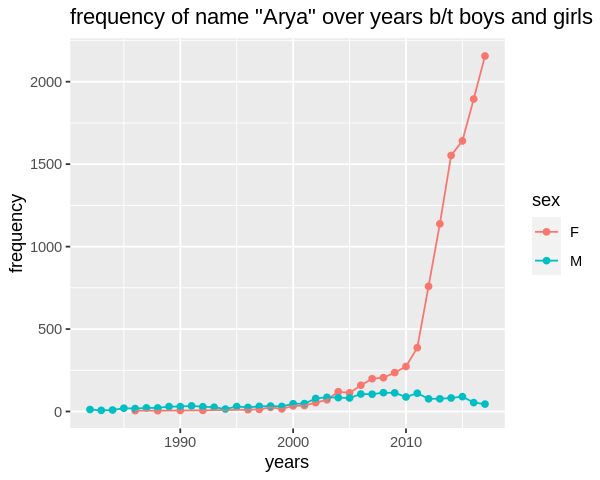

In [ ]:
babynames %>% 
  filter(name == 'Arya') %>%
    ggplot(aes(x = year, y = n, color = sex)) +
    geom_point() +
    geom_line() +
    xlab('years') + 
    ylab('frequency') +
    ggtitle('frequency of name "Arya" over years b/t boys and girls')

# starting 2003, the gap between female and male proportion started and while female "Arya" grew rapidly in 2010s, 
# male proportion of "Arya" decreased slightly
# this may happened as name "Arya" became more female preferred name than before (may used to be unisex name before)


**(c)** Define a name to be "timeless" if it was among the ten most popular names in both 2015 and 1915. How many timeless names are there, and what are they? _2 points_

In [ ]:
x <- babynames %>%
  filter(year == 1915) %>%  
  arrange(desc(n)) %>%
  top_n(10, n) 

y <- babynames %>%
  filter(year == 2015) %>%  
  arrange(desc(n)) %>%
  top_n(10, n)

intersect(x$name, y$name)
#1; William

[1] "William"

## Problem 2: Manipulating `flights` (4 points)
This problem contines with the `flights` table that we saw this week in lecture. Recall that we first need to load this database by typing:

In [ ]:
library(nycflights13)

(If you are running on Google Colab, you will also need to install this package each time you start the notebook.)

**(a)** Use `filter()` to find all the flights that had an arrival delay of more than two hours. How many of these flights were there? *1/2 point*

In [ ]:
flights %>%
  filter(arr_delay > 2) %>%
  summarise(n = n()) 
#123096 flights

n
<int>
123096


**(b)** Was there a flight scheduled on every day of 2013? If so, write code that verifies this. If not, write code that shows which days had no scheduled flights. *1/2 point*

In [ ]:
flights %>%
  filter(year == 2013) %>%
  group_by(year, month,day) %>%
  summarise() %>%
  nrow()

# yes, there was flight scheduled on every day of 2013
# there are 365 rows in total, which indicates that there is 365 unique combinations of year, month and day
# thus, since 1 year = 365 days, there is no day that flight was not scheduled

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


[1] 365

**(c)** Say you want to maximize your chance of taking a flight that leaves on time (or early). Which airport and carrier should you choose? (For example, "UA departing out of EWR"). Support your reasoning with code. _1 point_

In [ ]:
new_df <- flights %>% mutate(delay = ifelse(dep_delay <= 0,1,0)) #add columns that assign 1 for no delay and 0 for delay

new_df %>%
  group_by(origin, carrier) %>%
  filter(!is.na(delay)) %>% #filter out no flight (cancellation)
  summarize(n = mean(delay)) %>% 
  arrange(desc(n)) #higher the n value is, higher the chance(proportion) that the flight has no delay, since 1 is for no delay


#HA departing out of JFK

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


origin,carrier,n
<chr>,<chr>,<dbl>
JFK,HA,0.7982456
EWR,9E,0.7775000
LGA,US,0.7748529
EWR,US,0.7690531
LGA,OO,0.7391304
LGA,AA,0.7232955
EWR,AA,0.7142857
LGA,MQ,0.7049231
LGA,9E,0.6964587


**(d)** What time of day should you fly if you want to avoid delays as much as possible? _2 points_ (This question is intentionally open-ended. There is no one correct answer. Use the data and the commands we have learned to argue your case.)

In [ ]:
new_df <- flights %>% mutate(delay_tot = ifelse(((dep_delay + arr_delay)/2) <= 0,1,0))

new_df %>%
  group_by(sched_dep_time) %>%
  filter(!is.na(delay_tot)) %>%
  summarize(n = mean(delay_tot)) %>%
  arrange(desc(n)) %>%
  top_n(1,n)

#fly scheduled at 5:01, 5:05, 5:16, 5:20, 5:28, 5:35, 5:38, 5:55, 5:57, 6:26, 6:57, 14:24, 21:33, 21:58, 22:01, 22:08, and 23:45 
#has 0% delay rate, so reliable

sched_dep_time,n
<int>,<dbl>
501,1
505,1
516,1
520,1
528,1
535,1
538,1
555,1
557,1


## Problem 3: Challenge problem (3 points)
Define a flight to be *spooky* if it was in transit at 13:13h (i.e. 1:13pm) on Friday the 13th of any month. You should assume that a flight is in transit between its `dep_time` and its `arr_time`. How many spooky flights are there in the dataset?

In [ ]:
head(flights)

In [ ]:
new_df = mutate(flights, date = make_date(year, month, day))

new_df %>%
  filter(day == 13) %>%
  filter(wday(date) == 6) %>%
  filter(dep_time <= 1313) %>%
  filter(arr_time >= 1313) %>%
  nrow() 

#there are 236 total "spooky" flights

[1] 236